# Análise Exploratória de Dados
Dataset: Quality Prediction in a Mining Process


## Conclusões iniciais

- Dataset grande e rico em variáveis de processo  
- Forte relação entre Iron e Silica Concentrate  
- Variáveis operacionais mostram correlação relevante com o target  
- Próximo passo: tratamento temporal e modelagem


## Concentração de Ferro

🔎 O que o formato mostra

Distribuição bem concentrada, com a maior parte dos valores entre ~63% e 67%

Pico bem definido → processo estável e controlado

Caudas curtas → poucos outliers extremos

📐 Características estatísticas implícitas

Baixa variância

Distribuição quase normal, levemente assimétrica

Ruído operacional pequeno

🧠 Interpretação de negócio/processo

O processo de concentração de ferro está maduro

Pequenas mudanças operacionais não alteram muito o teor final de ferro

Isso explica por que:

modelos costumam ter RMSE baixo em valor absoluto

mas difíceis ganhos marginais (erro relativo importa mais)

👉 Modelar Iron costuma ser “fácil”, mas com teto de performance

## Concentração de Silica

🔎 O que o formato mostra

Distribuição fortemente assimétrica à direita

Grande concentração entre ~0.5% e 3%

Cauda longa chegando a ~6–7%

🚨 Ponto importantíssimo

Essa distribuição NÃO é normal.

Ela indica:

Regimes operacionais diferentes

Momentos de perda de eficiência do processo

Alta sensibilidade a variáveis de controle (pH, fluxo de ar, amina, etc.)

📐 Características estatísticas

Alta variância

Presença clara de outliers operacionais

Média > mediana (por causa da cauda)

🔍 Gráfico Scatter
🔻 1️⃣ Relação fortemente negativa

Quanto maior o Iron, menor a Silica.

Visualmente:

Nuvem inclinada da esquerda-cima → direita-baixo

Isso indica correlação negativa forte

👉 Não é coincidência, é lei física do processo de flotação.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

# Ajuste o caminho para onde o arquivo CSV foi salvo
df = pd.read_csv(
    'data/MiningProcess_Flotation_Plant_Database.csv',
    decimal=',',
    parse_dates=['date']
)

df.head()


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:

df.shape


(737453, 24)

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [6]:

df.describe().T


,count,mean,min,25%,50%,75%,max,std
date,737453,2017-06-16 03:27:22.656549376,2017-03-10 01:00:00,2017-05-04 23:00:00,2017-06-16 15:00:00,2017-07-29 07:00:00,2017-09-09 23:00:00,NaN
% Iron Feed,737453.0,56.294739,42.74,52.67,56.08,59.72,65.78,5.157744
% Silica Feed,737453.0,14.651716,1.31,8.94,13.85,19.6,33.4,6.807439
Starch Flow,737453.0,2869.140569,0.002026,2076.32,3018.43,3727.73,6300.23,1215.203734
Amina Flow,737453.0,488.144697,241.669,431.796,504.393,553.257,739.538,91.230534
Ore Pulp Flow,737453.0,397.578372,376.249,394.264,399.249,402.968,418.641,9.699785
Ore Pulp pH,737453.0,9.767639,8.75334,9.52736,9.7981,10.038,10.8081,0.387007
Ore Pulp Density,737453.0,1.68038,1.51982,1.64731,1.6976,1.72833,1.85325,0.069249
Flotation Column 01 Air Flow,737453.0,280.151856,175.51,250.281,299.344,300.149,373.871,29.621288
Flotation Column 02 Air Flow,737453.0,277.159965,175.156,250.457,296.223,300.69,375.992,30.149357


In [7]:

df.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

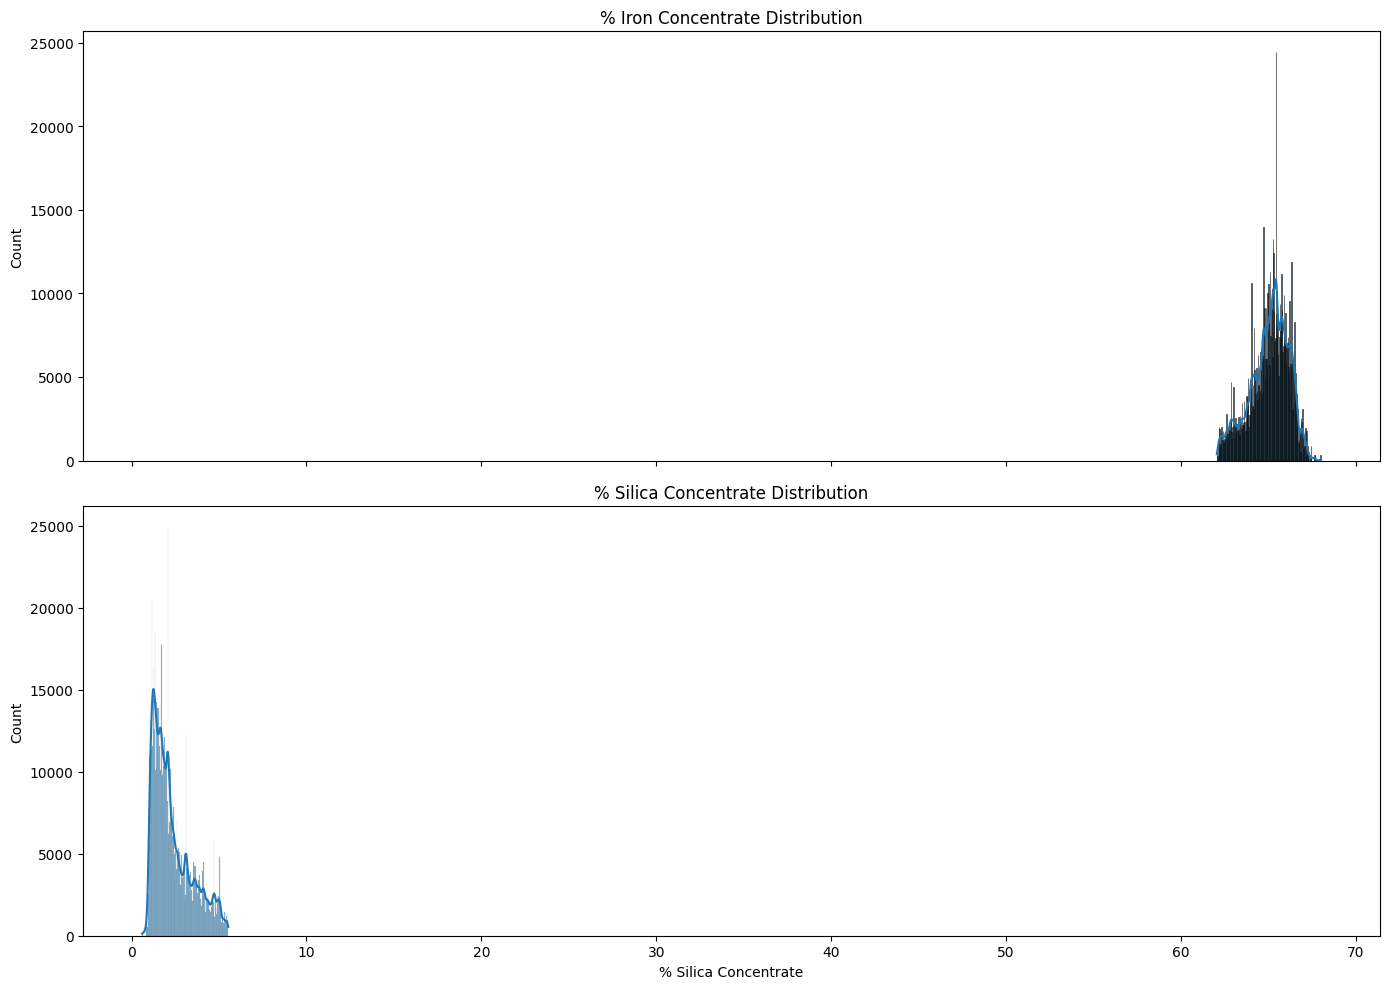

In [8]:

# Distribuição das variáveis alvo
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

sns.histplot(df['% Iron Concentrate'], kde=True, ax=axes[0])
axes[0].set_title('% Iron Concentrate Distribution')

sns.histplot(df['% Silica Concentrate'], kde=True, ax=axes[1])
axes[1].set_title('% Silica Concentrate Distribution')

plt.tight_layout()
plt.show()


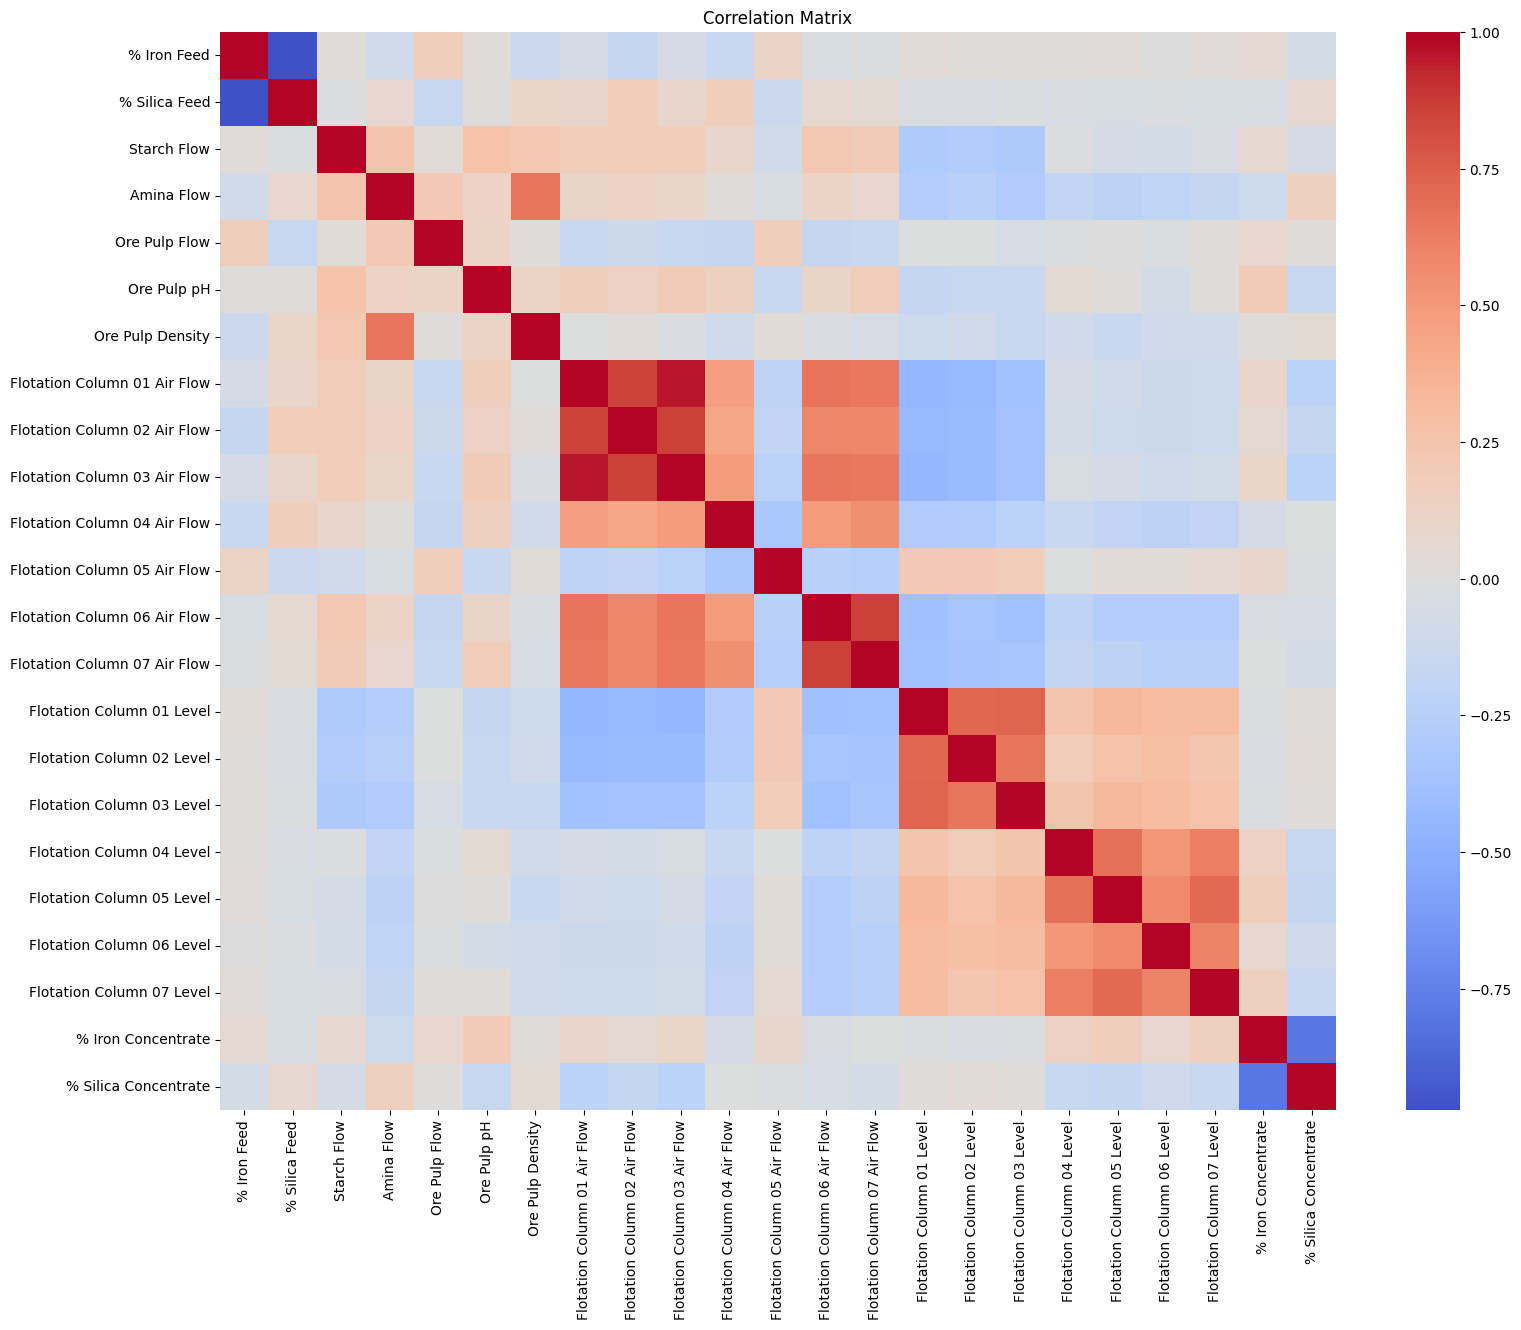

In [9]:

# Correlação
corr = df.drop(columns=['date']).corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


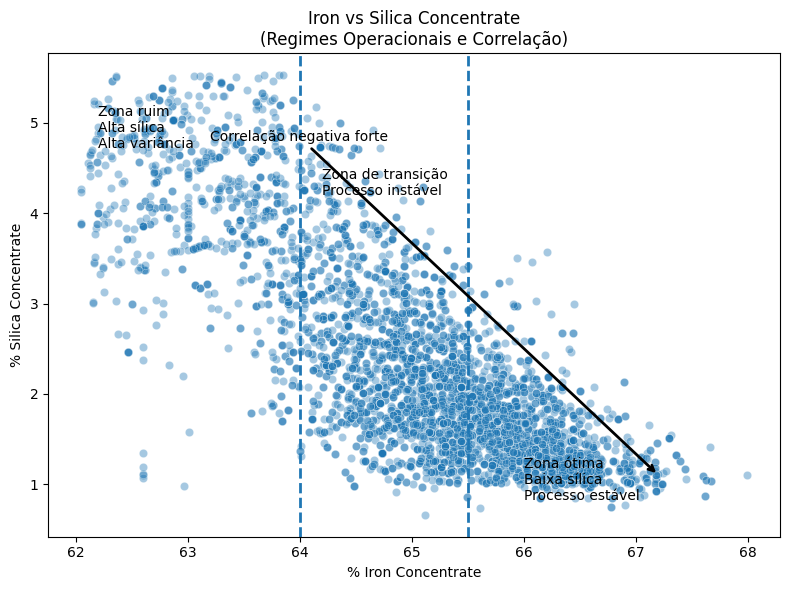

In [10]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='% Iron Concentrate',
    y='% Silica Concentrate',
    data=df.sample(5000, random_state=42),
    alpha=0.4
)

# 🔹 Linhas verticais para os regimes
plt.axvline(64, linestyle='--', linewidth=2)
plt.axvline(65.5, linestyle='--', linewidth=2)

# 🔹 Anotações dos regimes
plt.text(62.2, 5.2, 'Zona ruim\nAlta sílica\nAlta variância',
         fontsize=10, verticalalignment='top')

plt.text(64.2, 4.5, 'Zona de transição\nProcesso instável',
         fontsize=10, verticalalignment='top')

plt.text(66.0, 1.3, 'Zona ótima\nBaixa sílica\nProcesso estável',
         fontsize=10, verticalalignment='top')

# 🔹 Seta mostrando correlação negativa
plt.annotate(
    'Correlação negativa forte',
    xy=(67.2, 1.1),      # ponta da seta
    xytext=(63.2, 4.8),  # texto
    arrowprops=dict(arrowstyle='->', linewidth=2),
    fontsize=10
)

plt.title('Iron vs Silica Concentrate\n(Regimes Operacionais e Correlação)')
plt.xlabel('% Iron Concentrate')
plt.ylabel('% Silica Concentrate')

plt.tight_layout()
plt.show()
